In [2]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
# nltk
import nltk

from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# sklearn



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [3]:

processed_data = pd.read_csv('Preprocesswithoutstopword.csv',encoding='latin-1')


In [4]:
processed_data.head()

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww that bummer you shoulda got david carr of ...
1,0,is upset that he can't update his Facebook by ...,en,is upset that he can update his facebook by te...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time for the ball managed to save 5...
3,0,my whole body feels itchy and like its on fire,en,my whole body feel itchy and like it on fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no it not behaving at all mad why am here beca...


In [5]:
text,sentiment=list(processed_data['clean_text'].values.astype('U')),list(processed_data['sentiment'])

In [6]:
for i in text:
    print(type(i))
    break;

<class 'numpy.str_'>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(text, sentiment,test_size = 0.10, random_state = 0)
print(f'Data Split done.')

Data Split done.


['andrea amp justin squared ',
 'nan',
 'see would without ',
 'lol reply put new chapter last see tomorrow ',
 'appointment genius bar today work ',
 'thank shit got leaked lol oh well purple rain dropping july3rd ',
 'oh cute happy birthday mum ',
 'went overhead located rotation lowering weakened funnel cloud roped ',
 'loved one hurt change mood everything ',
 'balcony summer air ',
 'purple peep keeping busy since girl aren tv today lol ',
 'move trying get bed new found respect stripper ',
 'ahh julia awesome person glad met blessed life pray frequently ',
 'said activisions dj hero look like winner missed launch part beatles rockband ',
 'tortured starving artist look don think pas ',
 'damn trying write conversation joey father first scene sw chap bit trouble ',
 'happy mother day working 11 hour ',
 'hey guy talking gimme detail ',
 'kyle get sf4 action first 100 win ',
 'spent last year largely ambivalent dev practice feel care factor returning look ',
 'stupid cloud kidnappe

In [8]:
vectoriser = TfidfVectorizer(max_features=50000,ngram_range=(1,1))
vectoriser.fit(X_train)

print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  50000


In [9]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [10]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Logistic Regression

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80     74642
           4       0.79      0.81      0.80     74057

    accuracy                           0.80    148699
   macro avg       0.80      0.80      0.80    148699
weighted avg       0.80      0.80      0.80    148699

[[59013 15629]
 [14421 59636]]


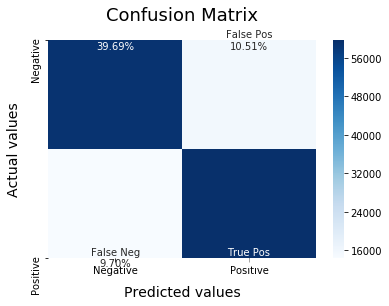

In [11]:
regressor = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
regressor.fit(X_train, y_train)
model_Evaluate(regressor)

In [ ]:
# Linear Support Vector Classifier

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.80      0.78      0.79     74642
           4       0.79      0.81      0.80     74057

    accuracy                           0.79    148699
   macro avg       0.79      0.79      0.79    148699
weighted avg       0.79      0.79      0.79    148699

[[58422 16220]
 [14340 59717]]


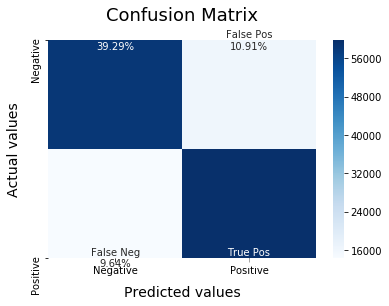

In [12]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

In [ ]:
# BernoulliNB

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     74642
           4       0.78      0.78      0.78     74057

    accuracy                           0.78    148699
   macro avg       0.78      0.78      0.78    148699
weighted avg       0.78      0.78      0.78    148699

[[58030 16612]
 [15984 58073]]


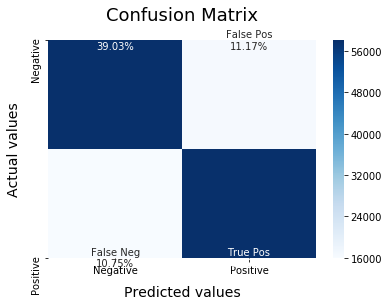

In [13]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

In [ ]:
# AdaBoostClassifier

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.71      0.75      0.73     74642
           4       0.73      0.69      0.71     74057

    accuracy                           0.72    148699
   macro avg       0.72      0.72      0.72    148699
weighted avg       0.72      0.72      0.72    148699

[[56246 18396]
 [23150 50907]]


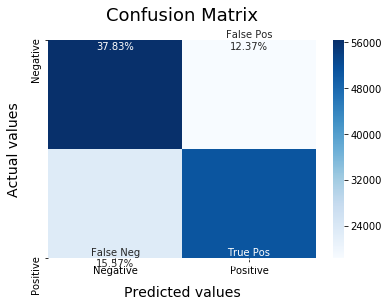

In [14]:
ac= AdaBoostClassifier(base_estimator = regressor,n_estimators=200, random_state=0)
ac.fit(X_train,y_train)
model_Evaluate(ac)

In [ ]:
# RandomForest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.77      0.76      0.76     74642
           4       0.76      0.77      0.76     74057

    accuracy                           0.76    148699
   macro avg       0.76      0.76      0.76    148699
weighted avg       0.76      0.76      0.76    148699

[[56374 18268]
 [16979 57078]]


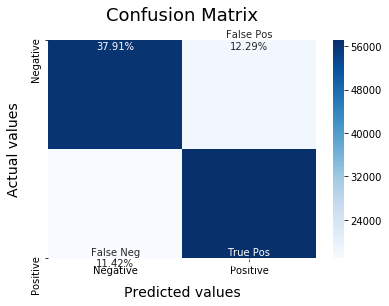

In [16]:
rf = RandomForestClassifier(max_depth=50,n_jobs=-1,n_estimators=100,verbose=1)
rf.fit(X_train,y_train)
model_Evaluate(rf)

In [ ]:
# Decision Tree

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     74642
           4       0.72      0.71      0.72     74057

    accuracy                           0.72    148699
   macro avg       0.72      0.72      0.72    148699
weighted avg       0.72      0.72      0.72    148699

[[53938 20704]
 [21197 52860]]


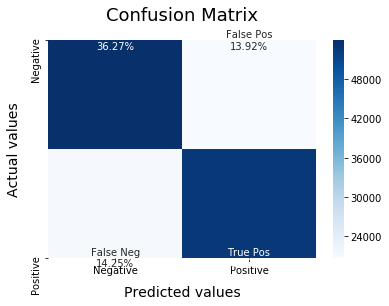

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
model_Evaluate(dt)

In [ ]:
# Multi-layer Perceptron

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     74642
           4       0.79      0.81      0.80     74057

    accuracy                           0.80    148699
   macro avg       0.80      0.80      0.80    148699
weighted avg       0.80      0.80      0.80    148699

[[58915 15727]
 [14424 59633]]


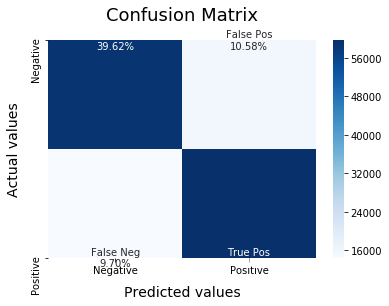

In [19]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=0)
mlp.fit(X_train, y_train)
model_Evaluate(mlp)

In [ ]:
# Generating Pikle file for each model and saving


In [20]:
import pickle
file = open('output for unigram Preprocesswithoutstopwords/vectoriser-ngram-.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/Sentiment-LR-ngram-.pickle','wb')
pickle.dump(regressor, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/SVCmodel-ngram-.pickle','wb')
pickle.dump(SVCmodel, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/BNBmodel-ngram-.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/ac-ngram-.pickle','wb')
pickle.dump(ac, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/rf-ngram-.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/dt-ngram-.pickle','wb')
pickle.dump(dt, file)
file.close()

file = open('output for unigram Preprocesswithoutstopwords/mlp-ngram-.pickle','wb')
pickle.dump(mlp, file)
file.close()